In [1]:
# Loading the Dataset by Declaring Variables

import os

DATA_PATH = r"D:\sem 2 AIDI\AI PROJECT docs\UrbanSound8K"
AUDIO_PATH = os.path.join(DATA_PATH, "audio")
METADATA_PATH = os.path.join(DATA_PATH, "metadata", "UrbanSound8K.csv")


In [2]:
!pip install librosa
!pip install seaborn
!pip install pandas
!pip install 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: You must give at least one requirement to install (see "pip help install")


Durations saved to: D:\sem 2 AIDI\AI PROJECT docs\UrbanSound8K\audio_durations.csv


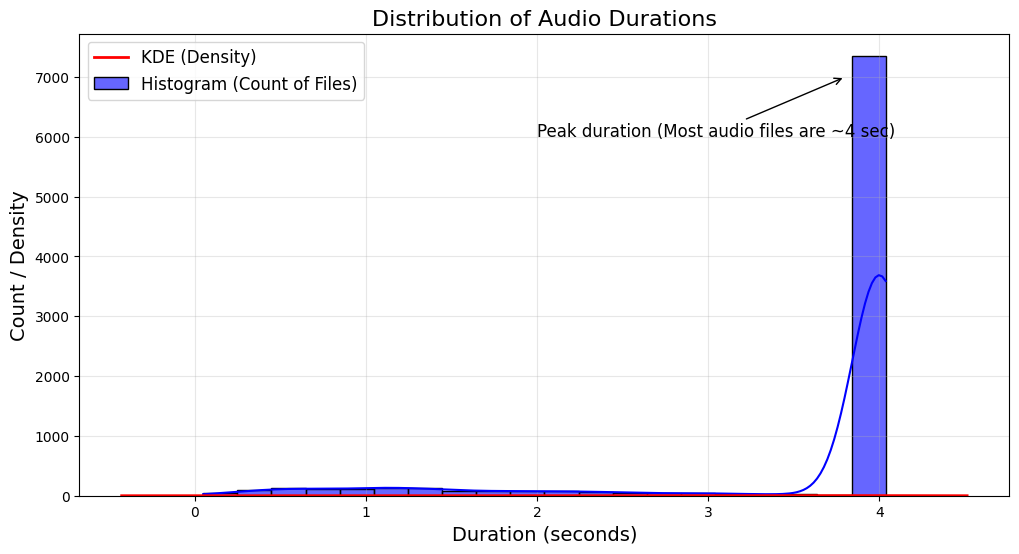

Number of audio files: 8732
Shortest audio file: 0.05 seconds
Longest audio file: 4.04 seconds
Average audio duration: 3.61 seconds


In [3]:
# Extracting Audio Durations

import librosa #For loading audio and calculating duration
import os  #For navigating the file system.
import pandas as pd  #To store and export results as a CSV.
import matplotlib.pyplot as plt  # For creating visualizations.
import seaborn as sns

# Initialize a list to store durations
durations = []
file_names = []

# Loop through all subfolders and audio files in the dataset
for folder in os.listdir(AUDIO_PATH):
    folder_path = os.path.join(AUDIO_PATH, folder)
    if os.path.isdir(folder_path):  # Check if it's a folder
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):  # Check if the file is a .wav file
                file_path = os.path.join(folder_path, file)
                # Load the audio file
                y, sr = librosa.load(file_path, sr=None)  # Use original sample rate
                duration = len(y) / sr  # Calculate duration in seconds
                durations.append(duration)
                file_names.append(file)  # Save the file name

# Save durations and file names to a CSV
durations_df = pd.DataFrame({'file_name': file_names, 'duration': durations})
output_csv_path = os.path.join(DATA_PATH, "audio_durations.csv")
durations_df.to_csv(output_csv_path, index=False)
print(f"Durations saved to: {output_csv_path}")

# Visualize the distribution of audio durations with annotations
plt.figure(figsize=(12, 6))

# Plot histogram and density line
sns.histplot(durations, bins=20, kde=True, color='blue', alpha=0.6, label='Histogram (Count of Files)')
sns.kdeplot(durations, color='red', linewidth=2, label='KDE (Density)')

# Add annotations and titles
plt.title('Distribution of Audio Durations', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Count / Density', fontsize=14)
plt.legend(fontsize=12)

# Add example annotation for clarity
plt.annotate('Peak duration (Most audio files are ~4 sec)', 
             xy=(3.8, 7000), xytext=(2, 6000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

# Show the plot
plt.grid(alpha=0.3)
plt.show()


# Print some summary statistics
print(f"Number of audio files: {len(durations)}")   
print(f"Shortest audio file: {min(durations):.2f} seconds")
print(f"Longest audio file: {max(durations):.2f} seconds")  #Prints the number of files, shortest, longest, and average audio durations.
print(f"Average audio duration: {sum(durations) / len(durations):.2f} seconds")


In [ ]:
import IPython.display as ipd  #To play audio
from glob import glob      #To find audio files matching a specific pattern

audio_files = glob(r"D:\sem 2 AIDI\AI PROJECT docs\UrbanSound8K\audio\fold1\7061-6-0-0.wav")
print(audio_files)

# Play audio file 
ipd.Audio(audio_files[0])

['D:\\sem 2 AIDI\\AI PROJECT docs\\UrbanSound8K\\audio\\fold1\\7061-6-0-0.wav']


Constructed File Path: D:\sem 2 AIDI\AI PROJECT docs\UrbanSound8K\audio\fold1\7061-6-0-0.wav
File exists.


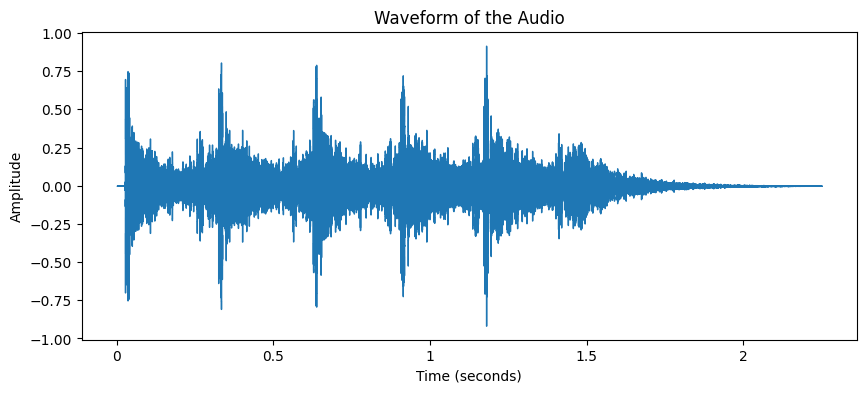

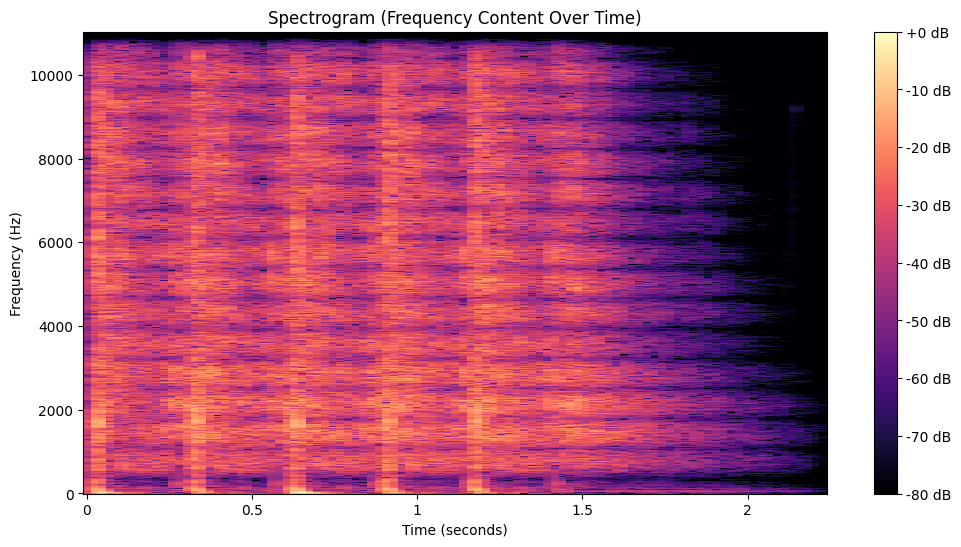

Shape of y (Number of samples): (49613,)
Sample rate: 22050 Hz


In [4]:
#visualizes:  plots the waveform to show amplitude over time and generates a spectrogram to visualize frequency content and intensity over time in decibels.
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Construct file path
file_path = os.path.join(AUDIO_PATH, "fold1", "7061-6-0-0.wav")
print(f"Constructed File Path: {file_path}")

# Check if the file exists
if os.path.exists(file_path):
    print("File exists.")
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of the Audio')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

    # Compute the Short-Time Fourier Transform (STFT) for frequency visualization
    D = np.abs(librosa.stft(y))  # Magnitude of the STFT
    freqs = librosa.fft_frequencies(sr=sr)  # Frequencies corresponding to STFT bins
    times = librosa.times_like(D, sr=sr)  # Time points corresponding to STFT columns

    # Convert to Decibels (log scale) for better visualization
    D_db = librosa.amplitude_to_db(D, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (Frequency Content Over Time)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

    # Print additional information
    print(f"Shape of y (Number of samples): {y.shape}")
    print(f"Sample rate: {sr} Hz")
else:
    print("File does not exist. Please verify the path.")


In [5]:
# Load Metadata

df = pd.read_csv(METADATA_PATH)
print(df.head())
print(f"Metadata loaded with {len(df)} rows and {len(df.columns)} columns.")

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
Metadata loaded with 8732 rows and 8 columns.


In [6]:
print("\n Pre-processing Metadata ")


# Check for null values
if df.isnull().sum().sum() > 0:
    print("Null values detected. Filling with default values.")
    df.fillna(0, inplace=True)

# Converting salience to categorical 
df['salience'] = df['salience'].astype('category')

# Converting classID to categorical
df['classID'] = df['classID'].astype('category')

print(df.dtypes)

print(df.head())




 Pre-processing Metadata 
slice_file_name      object
fsID                  int64
start               float64
end                 float64
salience           category
fold                  int64
classID            category
class                object
dtype: object
      slice_file_name    fsID  start        end salience  fold classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551        1     5       3   
1  100263-2-0-117.wav  100263   58.5  62.500000        1     5       2   
2  100263-2-0-121.wav  100263   60.5  64.500000        1     5       2   
3  100263-2-0-126.wav  100263   63.0  67.000000        1     5       2   
4  100263-2-0-137.wav  100263   68.5  72.500000        1     5       2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  



  Performing EDA on the metadata 

--- Dataframe Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   slice_file_name  8732 non-null   object  
 1   fsID             8732 non-null   int64   
 2   start            8732 non-null   float64 
 3   end              8732 non-null   float64 
 4   salience         8732 non-null   category
 5   fold             8732 non-null   int64   
 6   classID          8732 non-null   category
 7   class            8732 non-null   object  
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 427.0+ KB
None

--- Descriptive Statistics ---
                fsID        start          end         fold
count    8732.000000  8732.000000  8732.000000  8732.000000
mean   116033.493816    38.645409    42.253312     5.385937
std     57991.017218    74.292126    74.369669     2.846820
min 

C:\Users\HP\AppData\Local\Temp\ipykernel_19360\3620964211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='class', data=df, order=class_counts.index, palette="viridis")


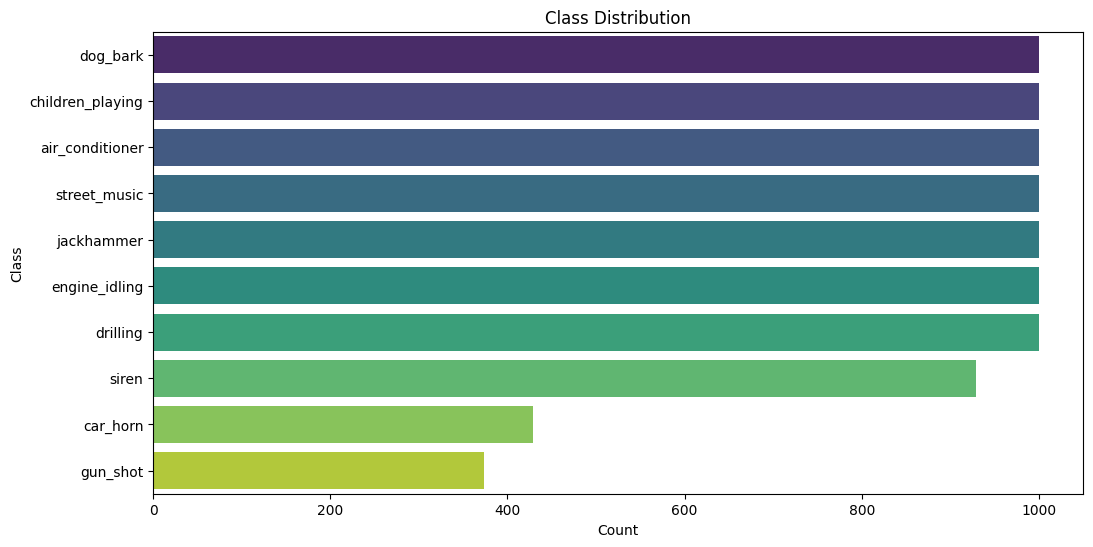


--- Fold Distribution ---


C:\Users\HP\AppData\Local\Temp\ipykernel_19360\3620964211.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fold', data=df, palette="coolwarm")


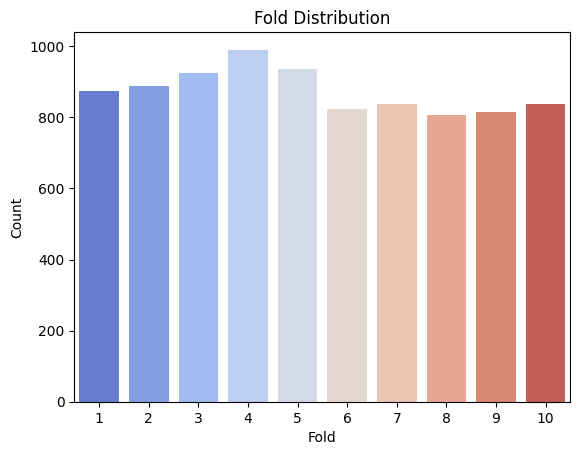

In [9]:
#EDA : understand the structure, summary statistics, and distribution of data before training our AI model.

print("\n  Performing EDA on the metadata ")

print("\n--- Dataframe Information ---")
print(df.info())

print("\n--- Descriptive Statistics ---")
print(df.describe())


print("\n--- Class Distribution ---")
class_counts = df['class'].value_counts()
print(class_counts)

#bar plot to visualize the number of samples in each class.
print("\n--- Visualizing Class Distribution ---")
plt.figure(figsize=(12, 6))
sns.countplot(y='class', data=df, order=class_counts.index, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Count")
plt.ylabel("Class")
plt.show()
#toidentify if any class is underrepresented

#for cross-validation in machine learning.
print("\n--- Fold Distribution ---")
fold_counts = df['fold'].value_counts()
sns.countplot(x='fold', data=df, palette="coolwarm")
plt.title("Fold Distribution")
plt.xlabel("Fold")
plt.ylabel("Count")
plt.show()